**Import Libraries**

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

**Assign the CSV file to a variable**

In [50]:
df= pd.read_csv("/Users/macbook/Downloads/API_SP.POP.TOTL_DS2_en_csv_v2_34/bank-full.csv", sep=";")


**View the Dataframe**

In [51]:
df.head(15)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


**Instantiate the encoder and assign X and y**

In [52]:
label_encoder= LabelEncoder()
X = pd.get_dummies(df.drop("y", axis=1), drop_first=True)
y = label_encoder.fit_transform(df["y"])

**Spliting**

In [53]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=42)  

**Instantiate Decision Tree Classifier**

In [54]:
dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


**Prediction**

In [55]:
y_pred= dtc.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(13564,))

++++

In [56]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))    

[[11666   300]
 [ 1043   555]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     11966
           1       0.65      0.35      0.45      1598

    accuracy                           0.90     13564
   macro avg       0.78      0.66      0.70     13564
weighted avg       0.89      0.90      0.89     13564



**Analysis**

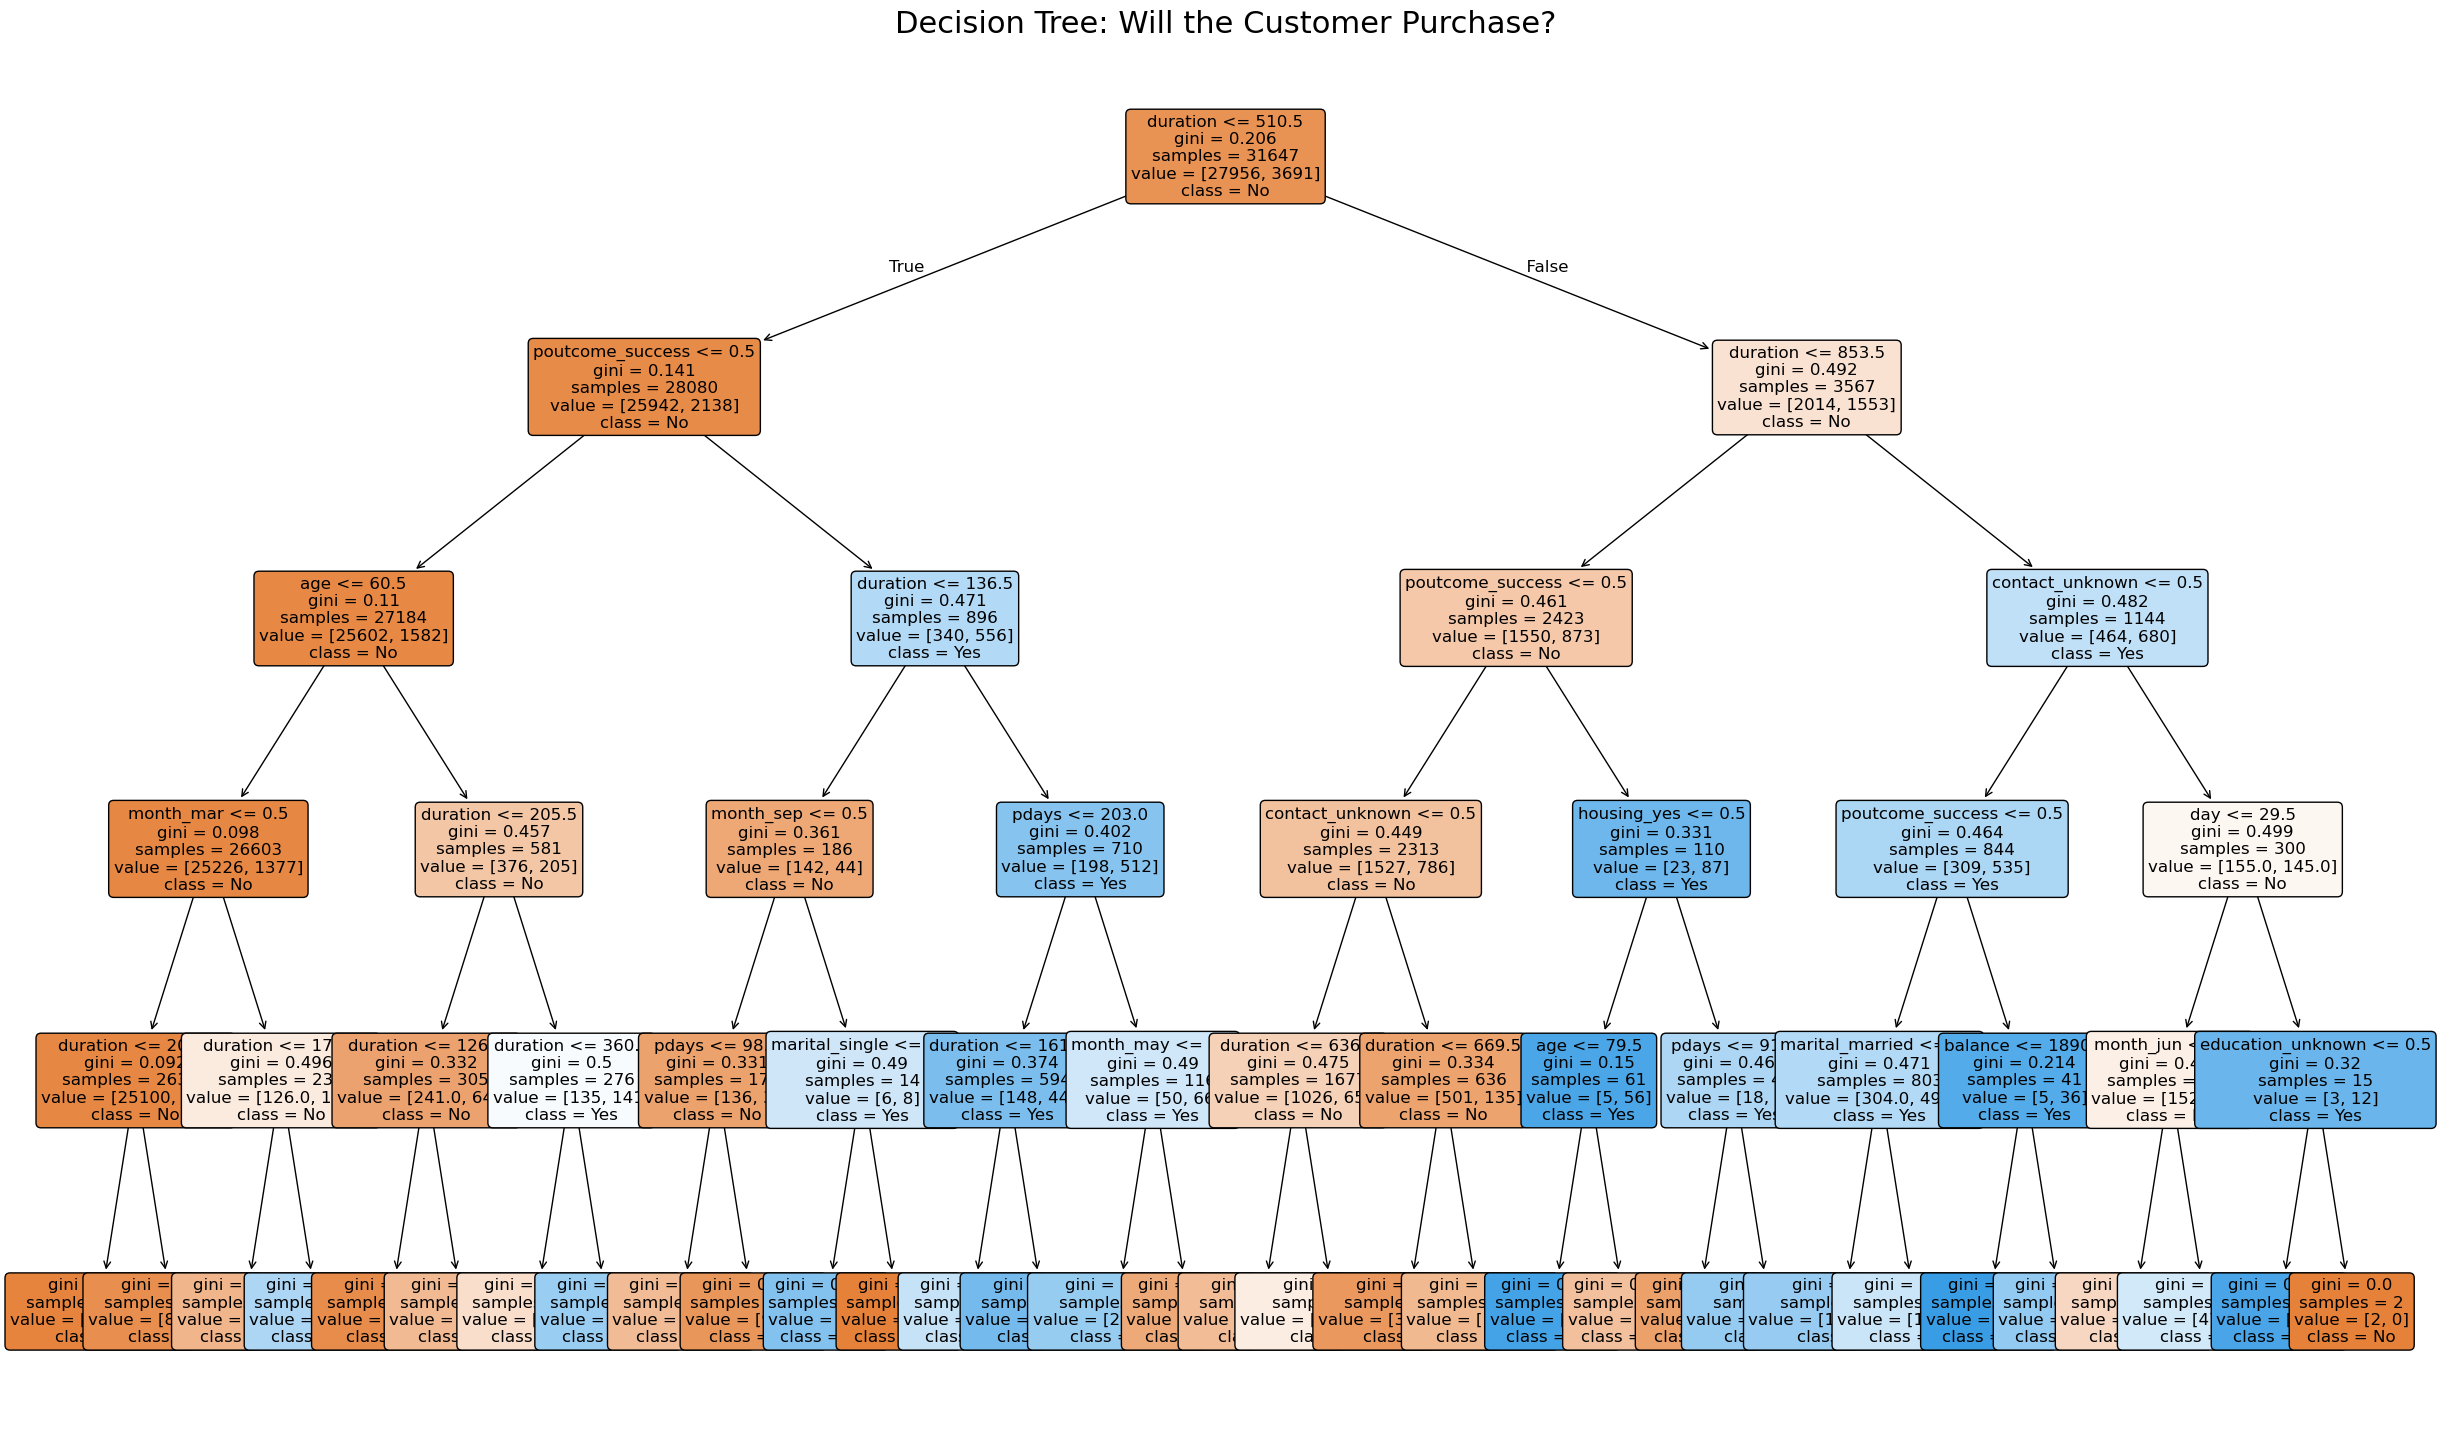

<Figure size 640x480 with 0 Axes>

In [57]:
plt.figure(figsize=(30, 18))
plot_tree(
    dtc,
    feature_names=X.columns,
    class_names=['No', 'Yes'],
    filled=True,
    rounded=True,
    fontsize=12
)
plt.title("Decision Tree: Will the Customer Purchase?", fontsize=22)
plt.show()

# (Optional) Save Tree as Image
plt.savefig("Client_Friendly_Decision_Tree.png", dpi=300, bbox_inches='tight')
